
# 13. HIGHER ORDER POLYNOMIAL REGRESSION

## TASK A: Prediction with High Degree Polynomials

### 0. Importing Libraries

In [103]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

### 1. For Degree 1

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

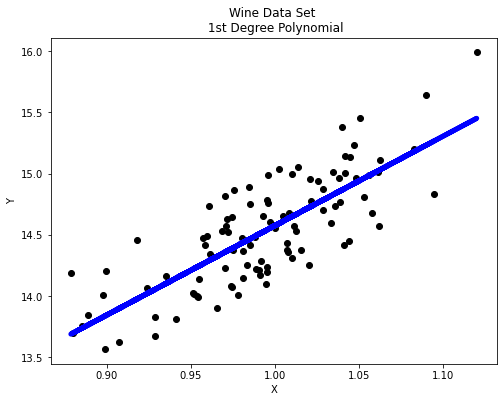

In [105]:
plt.figure(figsize=(8,6)) 
plt.scatter(X, Y, color='black')
plt.plot(X, lin_reg.predict(X), color='blue',linewidth=5)
plt.title('Wine Data Set \n 1st Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


### 2. For Degree 2

In [106]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
model = model.fit(X, Y)
coef_two=(model.named_steps['linear'].coef_)[0]

In [107]:
def two_degree(x):
    return coef_two[0]+coef_two[1]*x+coef_two[2]*(x**2)

K=np.arange(0.87,1.13,0.001)

two_degree_points=[]
for i in K:
    two_degree_points.append(two_degree(i))

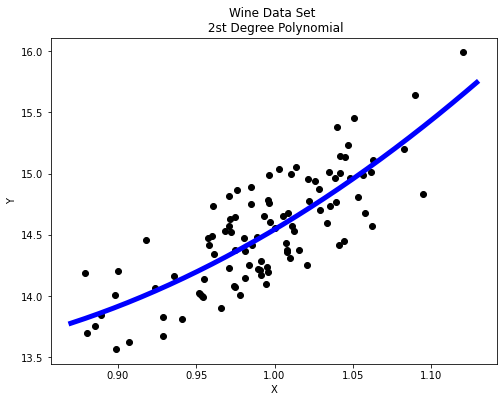

In [108]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Data Set \n 2st Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,two_degree_points,color='blue',linewidth=5)
plt.scatter(X, Y, color='black')
plt.show()

### 3. For Degree 7

In [109]:
model_seven = Pipeline([('poly', PolynomialFeatures(degree=7)),('linear', LinearRegression(fit_intercept=False))])
model_seven = model_seven.fit(X, Y)
coef_seven=(model_seven.named_steps['linear'].coef_)[0]


In [110]:
coef_seven

array([-5.55030163e+06,  3.96814953e+07, -1.21432147e+08,  2.06188150e+08,
       -2.09800637e+08,  1.27928677e+08, -4.32840738e+07,  6.26885149e+06])

In [111]:
def poly_seven(x):
    return coef_seven[0]+coef_seven[1]*x+coef_seven[2]*(x**2)+coef_seven[3]*(x**3)+coef_seven[4]*(x**4)+coef_seven[5]*(x**5)+coef_seven[6]*(x**6)+coef_seven[7]*(x**7)

In [112]:
K=np.arange(0.89,1.13,0.0000005)

seven_degree_points=[]
for i in K:
    seven_degree_points.append(poly_seven(i))

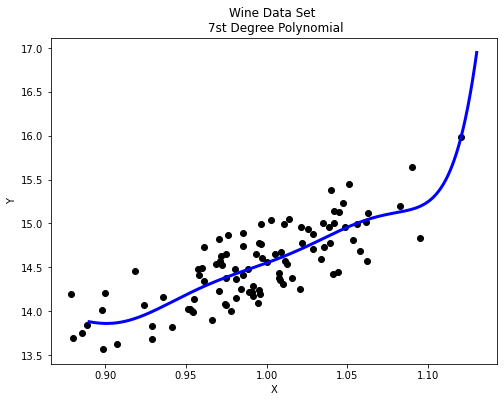

In [113]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Data Set \n 7st Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,seven_degree_points,color='blue',linewidth=3)
plt.scatter(X, Y, color='black')
plt.show()

### 3. For Degree 10

In [114]:
model_ten = Pipeline([('poly', PolynomialFeatures(degree=10)),('linear', LinearRegression(fit_intercept=False))])
model_ten = model_ten.fit(X, Y)
coef_ten=(model_ten.named_steps['linear'].coef_)[0]


In [115]:
len(coef_ten)

11

In [116]:
def poly_ten(x):
    total = 0
    for i in range(0,11):
        total=total +coef_ten[i]*(x**i)
    return total

In [289]:
K=np.arange(0.878,1.121,0.000005)

ten_degree_points=[]
for i in K:
    ten_degree_points.append(poly_ten(i))

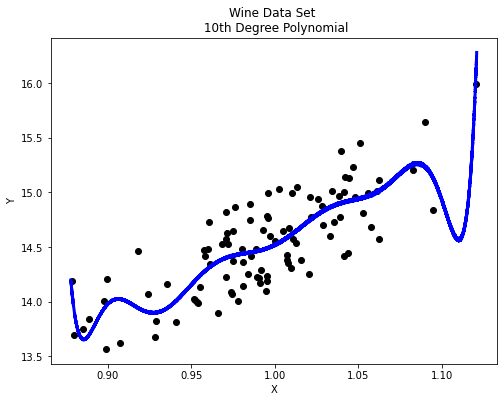

In [290]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Data Set \n 10th Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,ten_degree_points,color='blue',linewidth=3)
plt.scatter(X, Y, color='black')
plt.show()

In [119]:
x=1
total =0
for i in range(0,10):
    total=total +coef_ten[i]*(x**i)

### 4. For 16 Degree

In [120]:
model_sixteen = Pipeline([('poly', PolynomialFeatures(degree=16)),('linear', LinearRegression(fit_intercept=False))])
model_sixteen = model_sixteen.fit(X, Y)
coef_sixteen=(model_sixteen.named_steps['linear'].coef_)[0]


In [121]:
def poly_sixteen(x):
    total=0
    for i in range(0,17):
        total = total + coef_sixteen[i]*(x**i)
    return total

In [250]:
K=np.arange(0.87,1.121,0.000005)

sixteen_degree_points=[]
for i in K:
    sixteen_degree_points.append(poly_sixteen(i))

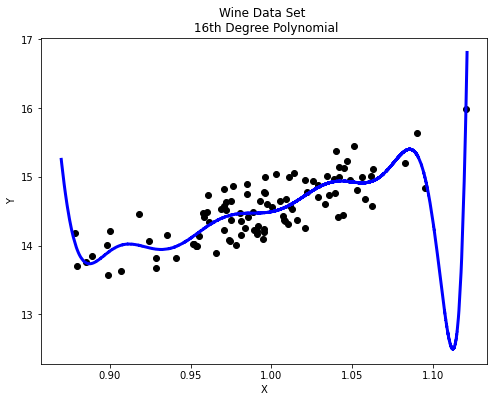

In [251]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Data Set \n 16th Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,sixteen_degree_points,color='blue',linewidth=3)
plt.scatter(X, Y, color='black')
plt.show()

### 5. For Degree 100

In [124]:
model_hundred= Pipeline([('poly', PolynomialFeatures(degree=100)),('linear', LinearRegression(fit_intercept=False))])
model_hundred = model_hundred.fit(X, Y)
coef_hundred=(model_hundred.named_steps['linear'].coef_)[0]


In [125]:
def poly_hundred(x):
    total=0
    for i in range(0,101):
        total = total + coef_hundred[i]*(x**i)
    return total

In [238]:
K=np.arange(0.87,1.0958,0.00005)

hundred_degree_points=[]
for i in K:
    hundred_degree_points.append(poly_hundred(i))

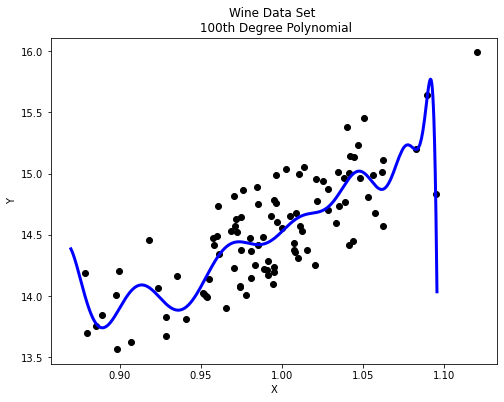

In [239]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Data Set \n 100th Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,hundred_degree_points,color='blue',linewidth=3)
plt.scatter(X, Y, color='black')
plt.show()

## TASK B: EFFECT of REGULARIZATION

### 0. Importing the Libraries

In [128]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

### 2. For $\lambda=10^{-6}$

In [129]:
model_reg_two = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=0.000001
                                                                   ,fit_intercept=False),)
model_reg_two = model_reg_two.fit(X, Y)
coeff_ridge_two=(model_reg_two.named_steps['ridge'].coef_)[0]

print(coeff_ridge_two)

[ 79.4280561  -67.31293392 -69.28685739 -11.20407908  47.46350114
  71.21901491  47.8976487  -11.37026128 -71.59308136 -72.7407836
  72.06175795]


In [130]:
def poly_reg_two(x):
    total=0
    for i in range(0,11):
        total = total + coeff_ridge_two[i]*(x**i)
    return total

In [131]:
K=np.arange(0.89,1.13,0.00005)

reg_two_list=[]
for i in K:
    reg_two_list.append(poly_reg_two(i))

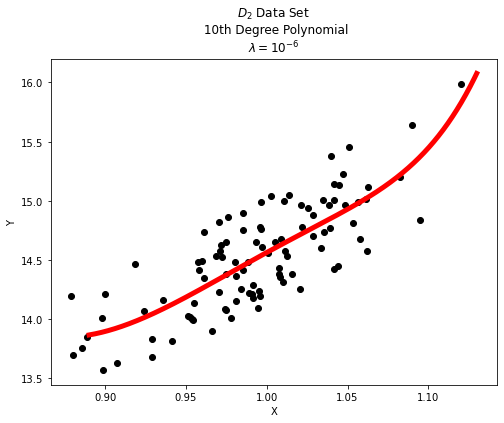

In [132]:
plt.figure(figsize=(8,6)) 
plt.title('$D_2$ Data Set \n 10th Degree Polynomial\n$\lambda=10^{-6}$')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,reg_two_list,'red',linewidth=5)
plt.scatter(X, Y, color='black')
plt.show()

### 3. For $\lambda=10^{-2}$ 

In [133]:
model_reg_three = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=0.01
                                                                   ,fit_intercept=False),)
model_reg_three = model_reg_three.fit(X, Y)
coeff_ridge_three=(model_reg_three.named_steps['ridge'].coef_)[0]
print(coeff_ridge_three)

[ 7.43600545  4.8613003   2.81319749  1.23809299  0.0941575  -0.64939828
 -1.01285901 -1.00635008 -0.62999951  0.12608011  1.28198904]


In [134]:
def poly_reg_three(x):
    total=0
    for i in range(0,11):
        total = total + coeff_ridge_three[i]*(x**i)
    return total

In [135]:
K=np.arange(0.89,1.14,0.00005)

reg_three_list=[]
for i in K:
    reg_three_list.append(poly_reg_three(i))

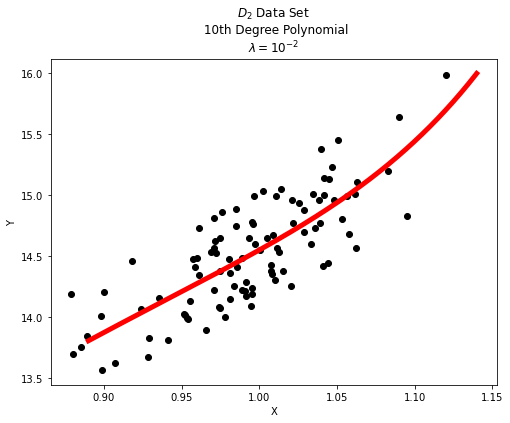

In [136]:
plt.figure(figsize=(8,6)) 
plt.title('$D_2$ Data Set \n 10th Degree Polynomial\n$\lambda=10^{-2}$')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,reg_three_list,'red',linewidth=5)
plt.scatter(X, Y, color='black')
plt.show()

### 4. For $\lambda=1$

In [138]:
model_reg_four = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=1
                                                                   ,fit_intercept=False),)
model_reg_four = model_reg_four.fit(X, Y)
coeff_ridge_four=(model_reg_four.named_steps['ridge'].coef_)[0]

print(coeff_ridge_four)

[ 4.73243173e+00  3.80152576e+00  2.96679022e+00  2.22038052e+00
  1.55564864e+00  9.67055987e-01  4.50101534e-01  1.26446988e-03
 -3.82039722e-01 -7.01490307e-01 -9.57879989e-01]


In [139]:
def poly_reg_four(x):
    total=0
    for i in range(0,11):
        total = total + coeff_ridge_four[i]*(x**i)
    return total

In [140]:
K=np.arange(0.89,1.13,0.00005)

reg_four_list=[]
for i in K:
    reg_four_list.append(poly_reg_four(i))

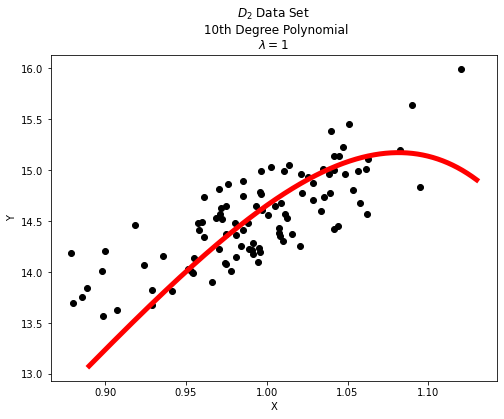

In [141]:
plt.figure(figsize=(8,6)) 
plt.title('$D_2$ Data Set \n 10th Degree Polynomial\n$\lambda=1$')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,reg_four_list,'red',linewidth=5)
plt.scatter(X, Y, color='black')
plt.show()

# EXERCISE 2: CONCLUSION

While degree of polynom increases, overfitting arises and RMSE decreases. 
While degree of polynom decreases, underfitting arises and RMSE increases.
While shrinkage increases, curvity of line decreases to decrease overfitting.

# EXERCISE 3: 
# IMPLEMENTING COORDINATE DESCENT

## 0. DATA PRE-PROCESSING

In [142]:
y_wine_quality = np.array(wine_quality['quality']).reshape((1599,1))

In [143]:
x_wine_quality_without_bias = np.array(wine_quality.iloc[:,:-1])

In [144]:
x_wine_quality=np.hstack((x_wine_quality_without_bias,np.ones((1599,1))))

In [145]:
x_wine_quality

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  1.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  1.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  1.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  1.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  1.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  1.   ]])

In [146]:
print(y_wine_quality.shape)
print(x_wine_quality.shape)

(1599, 1)
(1599, 12)


## 1. COORDINATE DESCENT

### 1.1 Defining the Functions 

#### 1. g(X,Y,beta,m)

In [147]:
def g_m(X,Y,beta,m):
    d=int(X.shape[0])
    X_m=np.delete(X, m, 1)
    beta_m = np.delete(beta,m,0)
    xm=X[:,m].reshape((d,1))
    return ((Y - (X_m@beta_m)).T @ xm)/(xm.T@xm)

#### 2.f(X,y,beta)

In [148]:
def f(X,Y,beta):
    return(Y-X@beta).T@(Y-X@beta)

#### 3. Minimize Coordinate Descent

In [149]:
def minimize_CD(X,Y,beta_initial,i_max):
    dim = int(beta_initial.shape[0])
    for i in range(0,i_max):
        beta_next=beta_initial
        for m in range(0,dim):
            beta_next[m]=g_m(X,Y,beta_next,m)
    return beta_next

#### 4. Learn-LInreg

In [150]:
def learn_linreg_CD(X,Y,i_max):
    dimension=int(X.shape[1])
    beta_zero = np.zeros((dimension,1))
    beta = minimize_CD(X,Y,beta_zero,i_max)
    return beta
    

### 2. Implementing CD Descent Algorithm

In [151]:
beta_list=[]
for i in range(1,200):
    a=learn_linreg_CD(x_wine_quality,y_wine_quality,i)
    beta_list.append(a)

In [152]:
table=pd.DataFrame(beta_list[0])
for i in range(0,199):
    table=pd.concat([table,pd.DataFrame(beta_list[i])],1)
table_new=pd.DataFrame(np.array(table))
zeros=pd.DataFrame(np.zeros((12,1)))
table_new =pd.concat([zeros,table_new],1)
table_new=pd.DataFrame(np.array(table_new).T)

In [153]:
table_new

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.651442,0.353127,-0.878587,0.064862,0.036232,0.007483,-0.001189,0.035029,0.009209,-0.018283,0.003060,-0.048716
2,0.651442,0.353127,-0.878587,0.064862,0.036232,0.007483,-0.001189,0.035029,0.009209,-0.018283,0.003060,-0.048716
3,0.629664,0.551912,-1.276574,0.090633,0.290524,0.012811,-0.002035,0.084818,0.017292,-0.017735,0.005379,-0.098449
4,0.610298,0.667673,-1.426714,0.097692,0.567653,0.016907,-0.002644,0.145313,0.024719,-0.008906,0.007418,-0.148607
...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.025358,-1.168601,-0.044299,0.010112,-2.009712,0.003896,-0.003365,6.238795,0.186837,1.010956,0.231179,-3.613602
197,0.025475,-1.168745,-0.045901,0.010057,-2.006141,0.003887,-0.003358,6.237894,0.186191,1.010524,0.231826,-3.617832
198,0.025592,-1.168874,-0.047483,0.010003,-2.002568,0.003879,-0.003351,6.236979,0.185545,1.010083,0.232468,-3.622008
199,0.025709,-1.168989,-0.049048,0.009949,-1.998994,0.003870,-0.003344,6.236051,0.184899,1.009636,0.233105,-3.626129


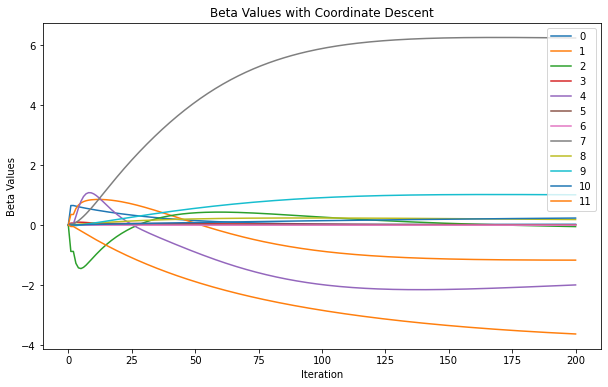

In [154]:
table_new.plot(title='Beta Values with Coordinate Descent',figsize=(10,6))
plt.legend(table_new, loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Beta Values')
plt.show()

## 2. COORDINATE DESCENT WITH L1

### 1. Defining the Functions

#### 1. Soft Function

In [174]:
def soft(x,e):
    if x>e:
        result=x-e
    elif x<-e:
        result=x+e
    elif abs(x)<=e:
        result=0
    return result
        

#### 2. Regularization Part

In [175]:
def reg_part(X,lamba,m):
    d=int(X.shape[0])
    xm=X[:,m].reshape((d,1))
    return lamba/(xm.T@xm)

#### 3. Function g(X,Y,beta,lamba)

In [176]:
def g_regularized(X,Y,beta,m,lamba):
    d=int(X.shape[0])
    X_m=np.delete(X, m, 1)
    beta_m = np.delete(beta,m,0)
    xm=X[:,m].reshape((d,1))
    value_one =((Y - (X_m@beta_m)).T @ xm)/(xm.T@xm)
    value_two =reg_part(X,lamba,m)
    return soft(value_one,value_two)

#### Minimize CD with Regularization

In [177]:
def reg_minimize_CD(X,Y,beta_initial,lamba,i_max):
    dim = int(beta_initial.shape[0])
    for i in range(0,i_max):
        beta_next=beta_initial
        for m in range(0,dim):
            beta_next[m]=g_regularized(X,Y,beta_initial,m,lamba)
    return beta_next

#### 3. Coordinate Descent with Regularization

In [178]:
def reg_learn_linreg_CD(X,Y,lamba,i_max):
    dimension=int(X.shape[1])
    beta_zero = np.zeros((dimension,1))
    beta = reg_minimize_CD(X,Y,beta_zero,lamba,i_max)
    return beta
    

### 2. Implementing CD Descent with Regularization Algorithm

In [199]:
reg_cd=[]
for l in range(1,100):
    b=reg_learn_linreg_CD(x_wine_quality,y_wine_quality,50,l)
    reg_cd.append(b)

In [200]:
reg_table=pd.DataFrame(reg_cd[0])
for i in range(0,99):
    reg_table=pd.concat([reg_table,pd.DataFrame(reg_cd[i])],1)

In [201]:
table_reg=pd.DataFrame(np.array(reg_table))
zeros=pd.DataFrame(np.zeros((12,1)))
table_reg =pd.concat([zeros,table_reg],1)
table_reg=pd.DataFrame(np.array(table_reg).T)

In [202]:
table_reg

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.651009,0.258472,-0.482912,0.043169,0.0,0.007891,-0.001187,0.001537,0.016414,0.000000,0.002240,-0.013383
2,0.651009,0.258472,-0.482912,0.043169,0.0,0.007891,-0.001187,0.001537,0.016414,0.000000,0.002240,-0.013383
3,0.623972,0.410961,-0.649446,0.059744,0.0,0.014270,-0.002025,0.022546,0.031911,0.000000,0.004773,-0.026868
4,0.598913,0.504592,-0.651575,0.063107,0.0,0.019194,-0.002615,0.058833,0.046809,0.000000,0.007460,-0.040028
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.054008,-0.551645,0.000000,0.000000,0.0,0.003958,-0.003439,0.613758,0.711627,0.201223,0.237807,0.000000
97,0.054480,-0.550721,0.000000,0.000000,0.0,0.003920,-0.003420,0.573177,0.716515,0.201619,0.239637,0.000000
98,0.054972,-0.549615,0.000000,0.000000,0.0,0.003884,-0.003400,0.532496,0.721396,0.201977,0.241454,0.000000
99,0.055485,-0.548333,0.000000,0.000000,0.0,0.003851,-0.003381,0.491725,0.726268,0.202299,0.243257,0.000000


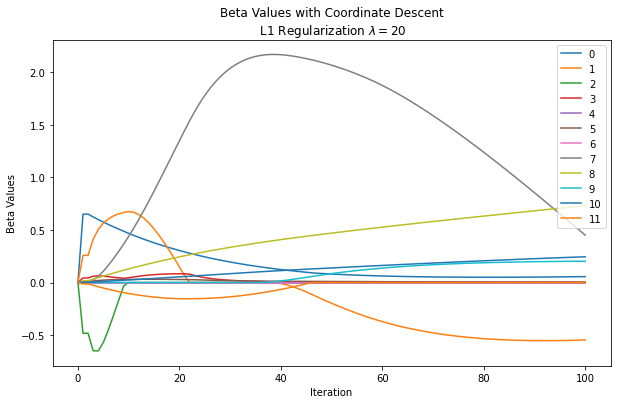

In [206]:
table_reg.plot(title='Beta Values with Coordinate Descent\n L1 Regularization $\lambda =20$',figsize=(10,6))
plt.legend(A, loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Beta Values')
plt.show()

# EXERCISE 3: CONCLUSION

Betas of non regularized model is greater than regularized one.
Regularization forces to Betas to be zero to overcome overfitting.